## Gamma($\alpha$, $\theta$) 
> $f(x) = \frac{x^{\alpha −1}e^{−x/ \theta}}{\theta^{\alpha}\Gamma ( \alpha ) }$                       
> $\mathbb{E}(X)=\alpha \theta$

## Pareto($\alpha$, $\theta$) 
>$f(x) = \frac{\alpha \theta^{\alpha}}{(x+\theta)^{\alpha+1}}$                        
>$ \mathbb{E}(X)=\frac{\theta}{\alpha-1}$                       

## Lognormal($\mu$, $\sigma$)
>$f(x)=\frac{1}{x\sigma \sqrt{2\pi}}e^{-\frac{1}{2}(\frac{\ln x - \mu}{\sigma})^2}$                    
>$\mathbb{E}(X)=e^{\mu+\sigma^2/2}$                       

In [6]:

import matplotlib.pyplot as plt
from scipy.stats import gamma, lognorm, pareto, norm
from scipy.special import gammainc
import pandas as pd
import numpy as np

import random

In [25]:
# Range of deductibles
deductibles = np.arange(0, 35.1, 0.1)
ler_df={}
def LER( pre, post):
    return post / pre

# Gamma(2,5)
shape_param = 2  # slpha
scale_param = 5  # theta
def ExpPay_deduct_gamma(deductible, shape=shape_param, scale=scale_param):
    return (gamma.cdf(deductible, a=shape, scale=scale)) * (gamma.mean(a=shape, scale=scale) )
ler_df['Gamma(2,5)'] = [LER( gamma.mean(shape_param,scale=scale_param), ExpPay_deduct_gamma(d)) for d in deductibles]

# LogNormal(0,1)
shape_param = 1  # sigma
scale_param = np.exp(0)  # exp(mu)
def ExpPay_deduct_lognorm(deductible, shape=shape_param, scale=scale_param):
    return (lognorm.cdf(deductible, shape, scale=scale)) * (lognorm.mean(shape, scale=scale) )
ler_df['lognorm(0,1)'] = [LER( lognorm.mean(shape_param,scale=scale_param), ExpPay_deduct_lognorm(d)) for d in deductibles]

# Pareto(2,1)
shape_param = 2  # alpha
scale_param = 1 # theta
def ExpPay_deduct_pareto(deductible, shape=shape_param, scale=scale_param):
    return (pareto.cdf(deductible, shape, loc=-scale)) * (pareto.mean(shape, loc=-scale) )
ler_df['pareto(2,1)'] = [LER( pareto.mean(shape_param,loc=-scale_param), ExpPay_deduct_pareto(d)) for d in deductibles]

ler_df=pd.DataFrame(ler_df)

In [26]:
ler_df

,"Gamma(2,5)","lognorm(0,1)","pareto(2,1)"
0,0.000000,0.000000,0.000000
1,0.000197,0.010651,0.173554
2,0.000779,0.053760,0.305556
3,0.001730,0.114300,0.408284
4,0.003034,0.179757,0.489796
...,...,...,...
346,0.992176,0.999803,0.999211
347,0.992312,0.999805,0.999215
348,0.992445,0.999807,0.999220
349,0.992576,0.999809,0.999224


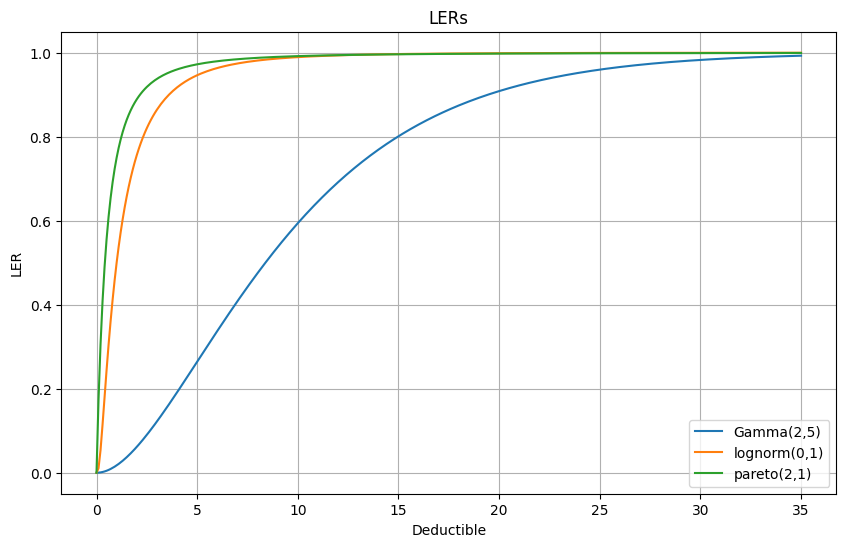

In [27]:
# Plot: LER vs deductibles
plt.figure(figsize=(10, 6))
plt.subplot(111)
plt.plot(deductibles, ler_df)
plt.xlabel('Deductible')
plt.ylabel('LER')
plt.title('LERs')
plt.legend(ler_df.columns)
plt.grid()

In [10]:
gamma.mean(a=2,loc=0,scale=5)

10.0

In [83]:
alpha=2

theta=5
alpha * theta
# alpha * theta * gammainc(alpha + 1, d / theta) + d * (1 - gammainc(alpha, d / theta))

10

In [8]:
norm.mean(1000,1)

1000.0